In [9]:
import sinesum as ss
import matplotlib.pyplot as plt
import numpy as np

#### Fourier Series of the Step function

In this Homework assignment, we built a partial series calculator that would give us an approximation of the sign($x$) function. The Method we used to approximate this function is by making use of the Fourier Series of the function.

It's coefficients are given by the integral (Well, more than likely approximately since I haven't done the calculation in a sec):
$$ a_n = \frac{1}{T} \int_{0}^{T/2}\sin(\frac{2 \pi nx}{T})dx $$

Where $L$ is the length of the interval of approximation around the origin. Using these coefficients we find that we can rewrite the sign($x$) function as:
$$ sign(x) = \sum_{n=1}^{\infty} \frac{4}{\pi} \frac{1}{2n-1} \sin\left(\frac{2 \pi (2n-1)}{T} t\right) $$

The next bit of code is just initializing the arrays that we will use to plot these partial sums, and will define the functions we will use to plot them.

In [10]:
T = 2*np.pi
F1Array = ss.Snarray(T,1)
F3Array = ss.Snarray(T,3)
F5Array = ss.Snarray(T,5)
F10Array = ss.Snarray(T,10)
F30Array = ss.Snarray(T,30)
F100Array = ss.Snarray(T,100)
FuncArray = ss.farray(T)
Time = ss.timespace(T)


def lowNplot():
    """args: none
       returns: null
       This function is used to plot the Fourier partial sums up to 5 against the sign function
       It should be used when after all of the arrays have been created"""
    fig = plt.figure(figsize = (8,12))

    a = plt.axes()
    a.plot(Time, F1Array, 'b.-', label="S_1")
    a.plot(Time, F3Array, 'k.-', label = "S_3")
    a.plot(Time, F5Array, 'g.-', label="S_5")
    a.plot(Time, FuncArray, 'r', label="Function being approximated")
    a.set(xlabel = 't', ylabel = 'f(t)')

    a.legend()

    plt.show()

def highNplot():
    """args: none
       returns: null
       This function is used to plot the Fourier partial sums from 10 to 100 against the sign function
       It should be used when after all of the arrays have been created"""
    fig = plt.figure(figsize = (8,12))

    a = plt.axes()
    a.plot(Time, F10Array, 'g.-', label = "S_10")
    a.plot(Time, F30Array, 'k.-', label="S_30")
    a.plot(Time, F100Array, 'b.-', label="S_100")
    a.plot(Time, FuncArray, 'r', label="Function being approximated")
    a.set(xlabel = 't', ylabel = 'f(t)')

    a.legend()

    plt.show()

We will first consider the case when our arbitrary parameter $\alpha$ is 1.

The plot in this case shows us the values of the sum on $[-\pi,\pi]$

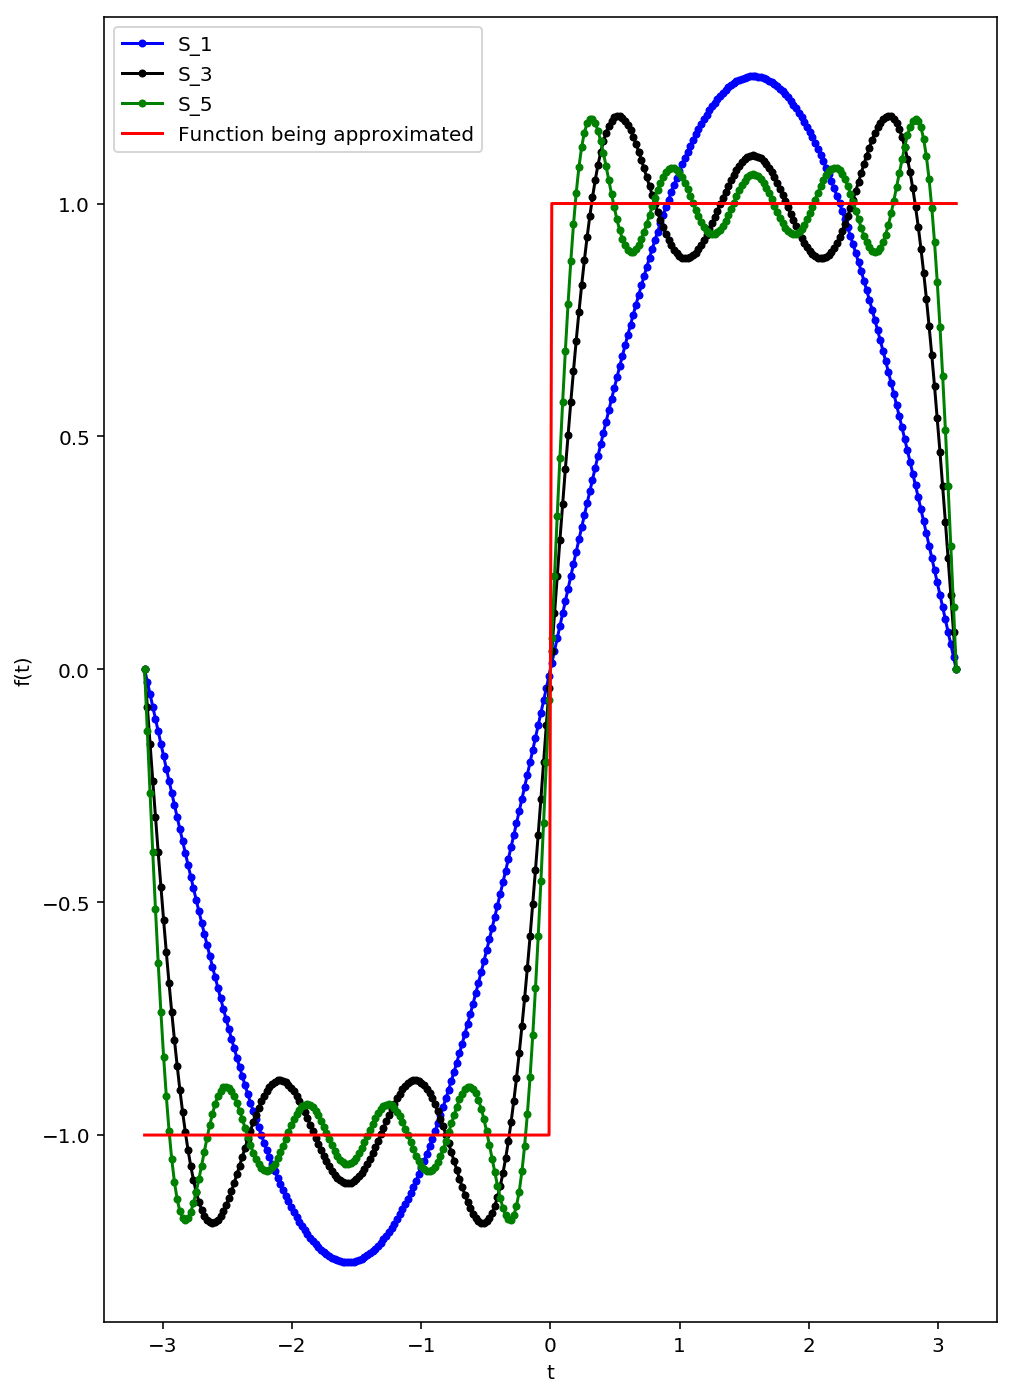

In [11]:
lowNplot()

As can be seen, the sinusoids are being summed to something that looks closer and closer like our step function.

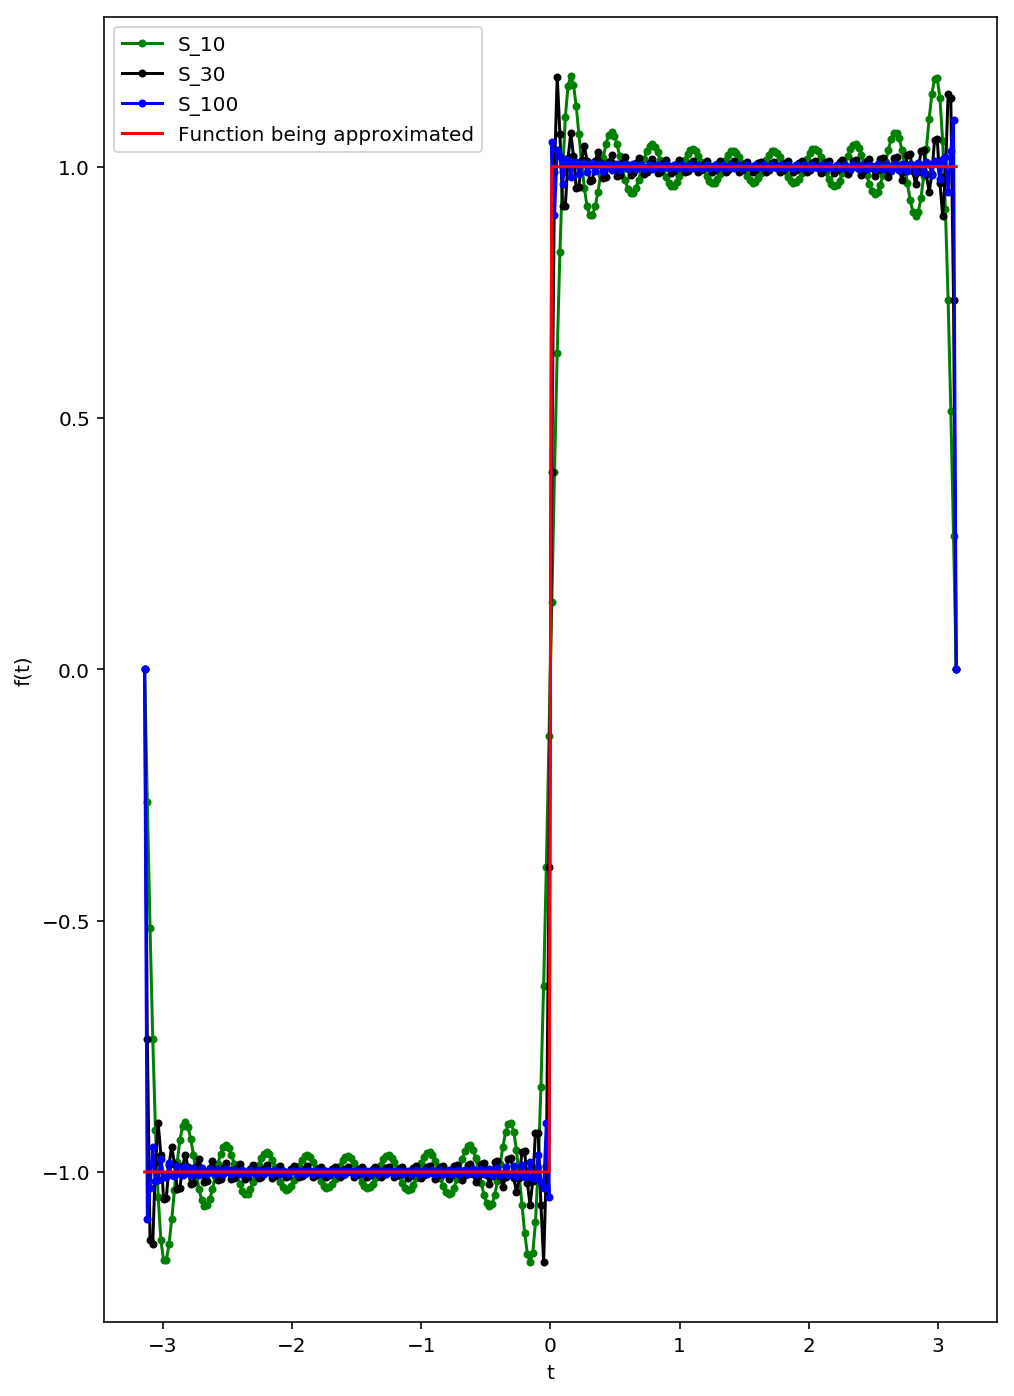

In [12]:
highNplot()

While this plot is definitely messier looking, the difference area between the distance of the step function and the partial sums is getting closer to 0, which is how we define this series converging to the function we wish to approximate.

Now let's see how well the approximation does for a specified point $t$

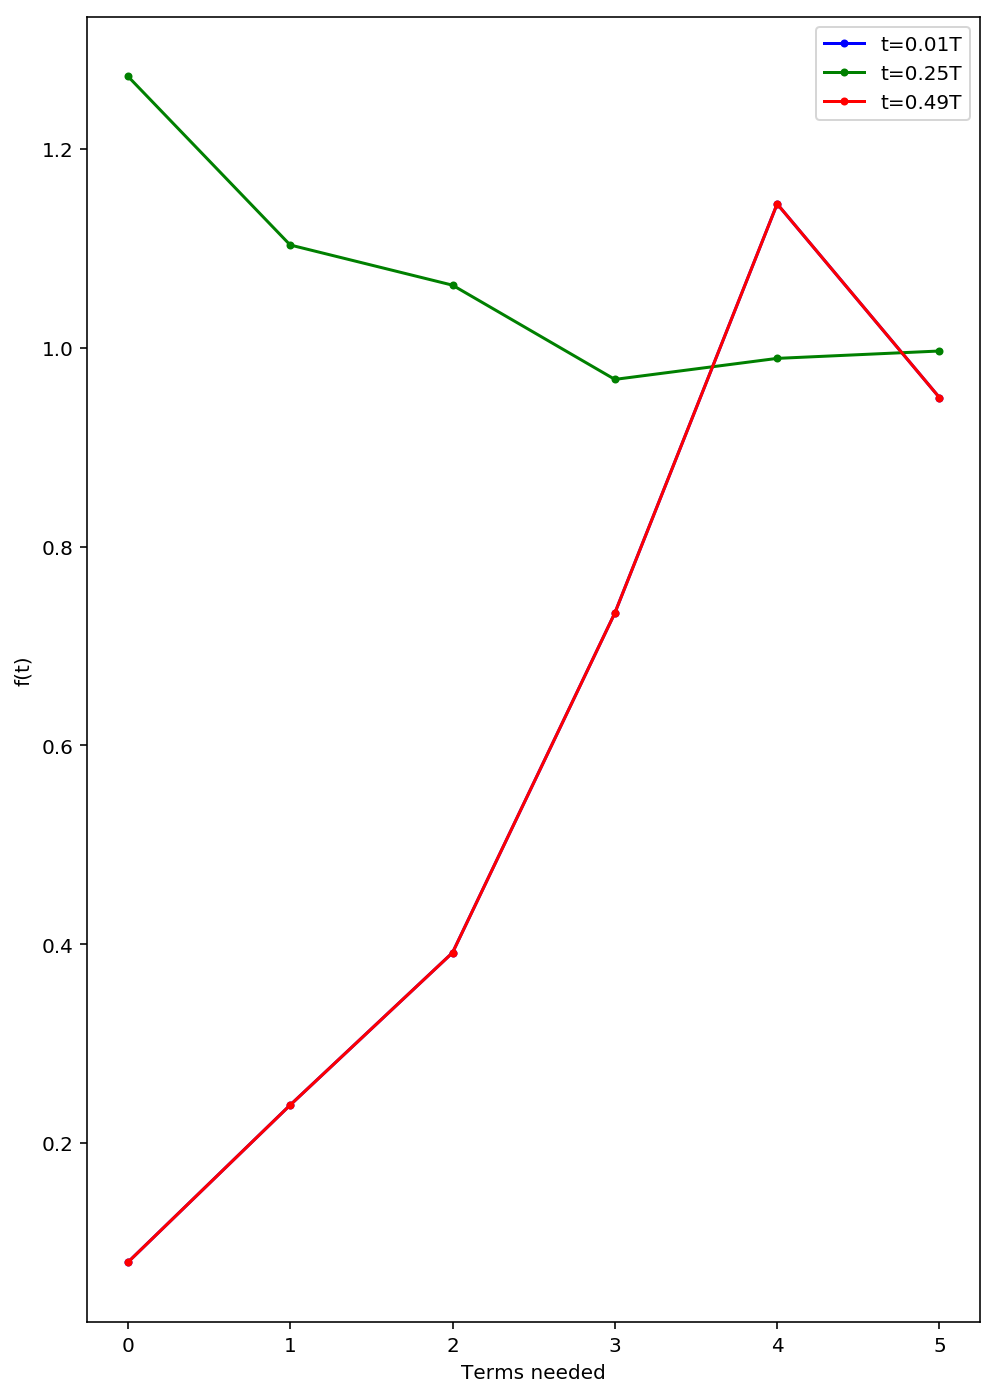

In [13]:
t_1 = 0.01*T
t_2 = 0.25*T
t_3 = 0.49*T

Kterms = np.array([1,3,5,10,30,100])
plotdom = np.arange(6)

approx_1 = ss.Sn(T,t_1,Kterms)
approx_2 = ss.Sn(T,t_2,Kterms)
approx_3 = ss.Sn(T,t_3,Kterms)

fig = plt.figure(figsize = (8,12))

a = plt.axes()
a.plot(plotdom, approx_1, 'b.-', label = "t=0.01T")
a.plot(plotdom, approx_2, 'g.-', label = "t=0.25T")
a.plot(plotdom, approx_3, 'r.-', label = "t=0.49T")
a.set(xlabel = 'Terms needed', ylabel = 'f(t)')

a.legend()

plt.show()

As we can see, this graph shows that at the specified $t$ values the sum of the sin functions does in fact approach 1 at the specified values, it is interesting to note that $\sin(x)$ having a point of symmetry around $x = \frac{\pi}{2}$ means that t_1 and t_3 have exactly the same approximation. This makes the lies look like they overlap. Under this I have included a graph which shows the rate at which the sum converges to 1 (it takes forever.)

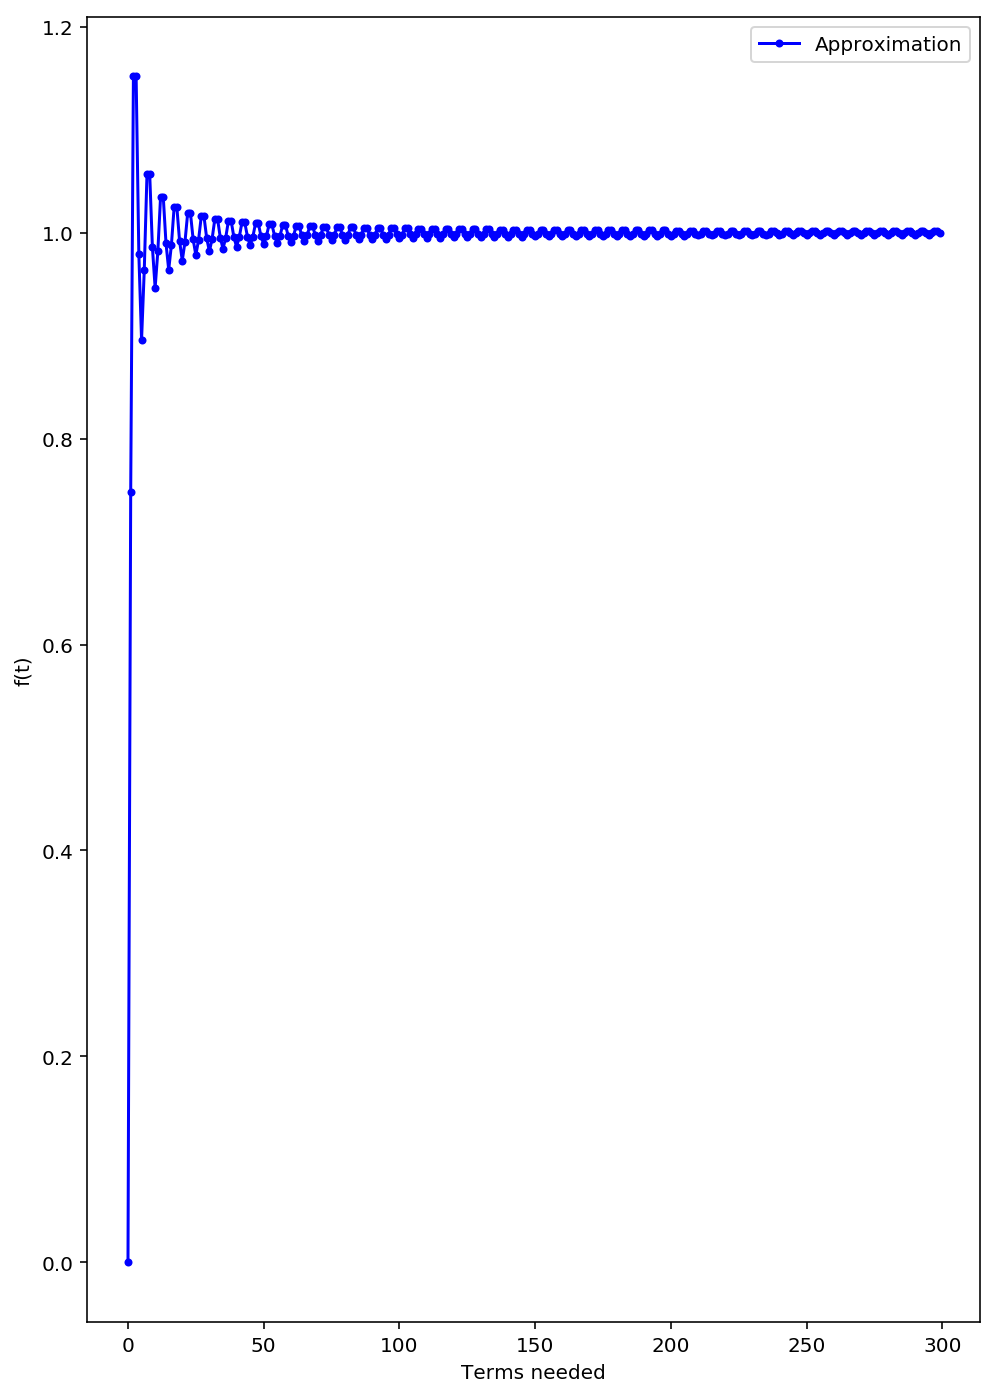

In [18]:
t_0 = 0.1*T

plotdom = np.arange(300)

approx_0 = ss.Sn(T,t_0,plotdom)

fig = plt.figure(figsize = (8,12))

a = plt.axes()
a.plot(plotdom, approx_0, 'b.-', label = "Approximation")
a.set(xlabel = 'Terms needed', ylabel = 'f(t)')

a.legend()

plt.show()